In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import itertools

%matplotlib widget

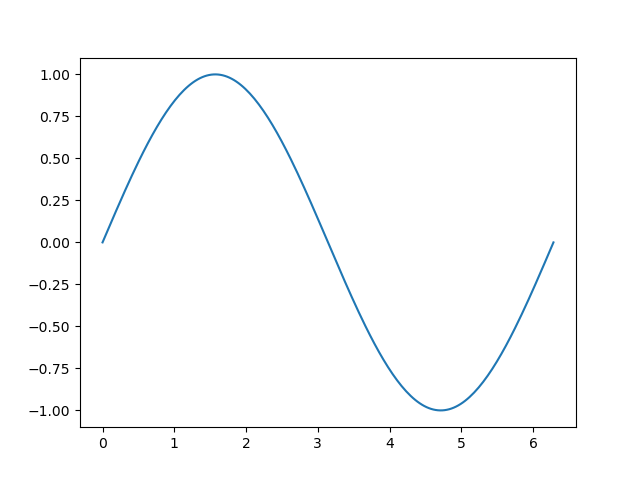

In [4]:
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 200)
line, = ax.plot(x, np.sin(x))

def update(frame):
    line.set_ydata(np.sin(x + 0.1 * frame))  # Shift sine wave
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

plt.show()

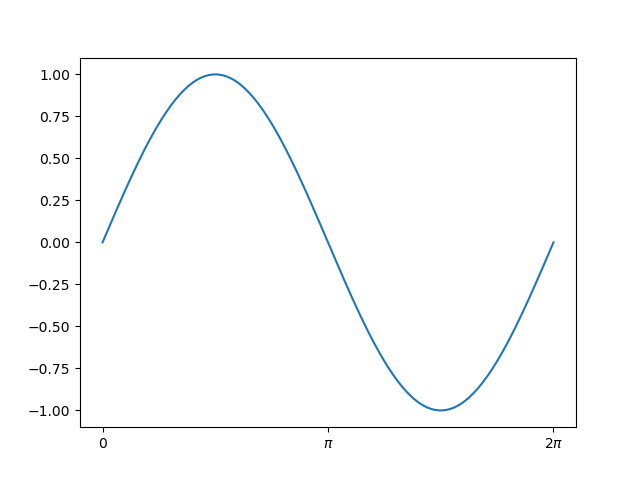

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots()

ax.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
# ax.hlines(0, 0,2 * np.pi)


# draw full curve to set view limits in right Axes
x = np.linspace(0, 2 * np.pi, 200)
sine, = ax.plot(x, np.sin(x))


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)

    return sine


ani = animation.FuncAnimation(
    fig,
    animate,
    interval=100,
    frames=x,
    repeat=False
)



plt.show()

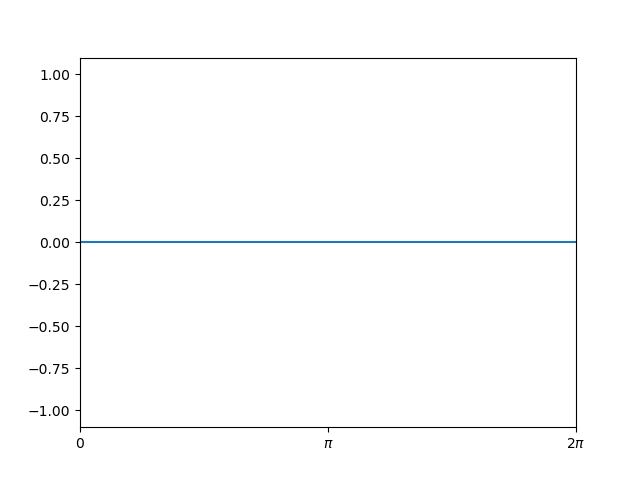

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
ax.hlines(0, 0, 2 * np.pi)
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.1, 1.1)

# Create two Line2D objects: one for sin, one for cos
sine_line, = ax.plot([], [], color='blue', lw=2, label='sin(x)')
cos_line, = ax.plot([], [], color='red', lw=2, label='cos(x)')

# ax.legend()

window_size = 1.0  # width of the snake

def animate(i):
    x_head = i * (2 * np.pi) / 100
    x_tail = max(0, x_head - window_size)
    x = np.linspace(x_tail, x_head, 100)
    
    sine_line.set_data(x, np.sin(x))
    cos_line.set_data(x, -np.sin(x))
    
    return sine_line, cos_line

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    frames=100,
    repeat_delay = 100
)

plt.show()


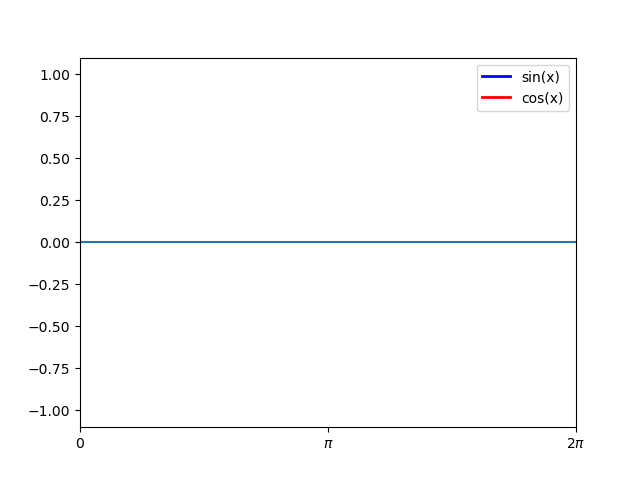

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
ax.hlines(0, 0, 2 * np.pi)
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.1, 1.1)

# Line objects for sine and cosine snakes
sine_line, = ax.plot([], [], color='blue', lw=2, label='sin(x)')
cos_line, = ax.plot([], [], color='red', lw=2, label='cos(x)')

# Dot objects for snake heads
sine_dot, = ax.plot([], [], 'o', color='blue')
cos_dot, = ax.plot([], [], 'o', color='red')

ax.legend()
window_size = 1.0

def animate(i):
    x_head = i * (2 * np.pi) / 100
    x_tail = max(0, x_head - window_size)
    x = np.linspace(x_tail, x_head, 100)

    # Update lines
    sine_line.set_data(x, np.sin(x))
    cos_line.set_data(x, -np.sin(x))

    # Update head dots
    sine_dot.set_data([x_head], [np.sin(x_head)])
    cos_dot.set_data([x_head], [-np.sin(x_head)])

    return sine_line, cos_line, sine_dot, cos_dot

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    frames=100,
    repeat=False
)

plt.show()


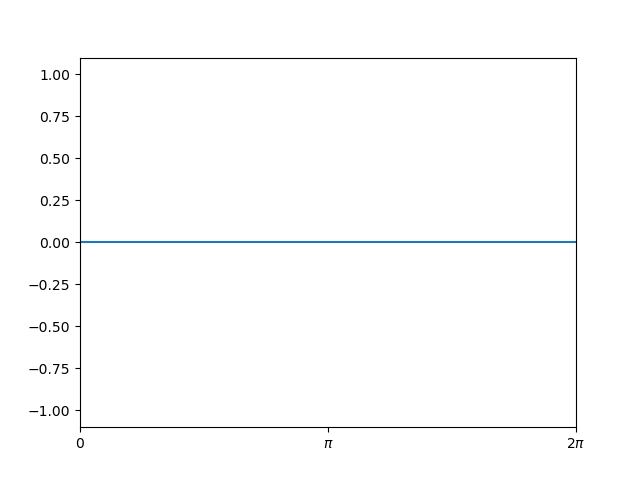

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
ax.hlines(0, 0, 2 * np.pi)
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.1, 1.1)

# Shooting star trail segments
N = 20
sine_segments = [
    ax.plot([], [], color='blue', lw=lw)[0]
    for lw in np.linspace(0.2, 3, N)
]
neg_sine_segments = [
    ax.plot([], [], color='red', lw=lw)[0]
    for lw in np.linspace(0.2, 3, N)
]

# Head dots
sine_dot, = ax.plot([], [], 'o', color='blue')
neg_sine_dot, = ax.plot([], [], 'o', color='red')

def animate(i):
    x_head = i * (2 * np.pi) / 100
    x_tail = max(0, x_head - 1.0)
    x_trail = np.linspace(x_tail, x_head, N + 1)

    for j in range(N):
        x_seg = [x_trail[j], x_trail[j + 1]]
        y_sine = np.sin(x_seg)
        y_neg_sine = -np.sin(x_seg)

        sine_segments[j].set_data(x_seg, y_sine)
        neg_sine_segments[j].set_data(x_seg, y_neg_sine)

    sine_dot.set_data([x_head], [np.sin(x_head)])
    neg_sine_dot.set_data([x_head], [-np.sin(x_head)])

    return sine_segments + neg_sine_segments + [sine_dot, neg_sine_dot]

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    frames=100,
    repeat=False
)

plt.show()


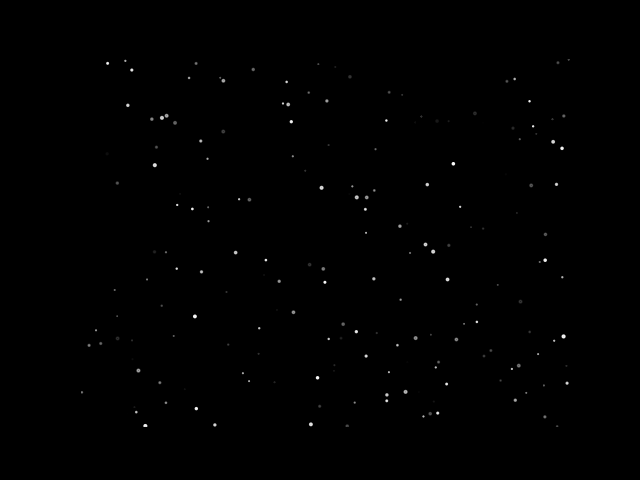

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib widget

np.random.seed(19680801)


N_star = 1000
x_star = np.random.uniform(0, 2 * np.pi, N_star)
y_star = np.random.uniform(-2 * np.pi, 2 * np.pi, N_star)
alpha_star = np.random.uniform(0, 1, N_star)

area = (2 * np.random.rand(N_star))**2

fig, ax = plt.subplots()

ax.scatter(x_star, y_star, s=area, c='white', alpha=alpha_star)


fig.patch.set_facecolor('black')  # Figure background
ax.set_facecolor('black')  # Axes background

ax.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
# ax.hlines(0, 0, 2 * np.pi)
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.1, 1.1)

# Shooting star segments
N = 50
sine_segments = [
    ax.plot([], [], color='gold', lw=lw, alpha=0)[0]
    for lw in np.linspace(0.2, 3, N)
]
neg_sine_segments = [
    ax.plot([], [], color='gold', lw=lw, alpha=0)[0]
    for lw in np.linspace(0.2, 3, N)
]

# Head dots
sine_dot, = ax.plot([], [], 'o', color='gold', alpha=0)
neg_sine_dot, = ax.plot([], [], 'o', color='gold', alpha=0)

total_frames = 1000
window_size = 2.0



def animate(i):
    # Ping-pong effect: forward then backward
    t = i if i < total_frames / 2 else total_frames - i
    progress = t / (total_frames / 2)

    x_head = progress * (2 * np.pi)
    x_tail = max(0, x_head - window_size)
    x_trail = np.linspace(x_tail, x_head, N + 1)

    # Fade in and out
    alpha = np.clip(np.sin(np.pi * progress), 0, 1)  # smooth fade in/out

    for j in range(N):
        x_seg = [x_trail[j], x_trail[j + 1]]
        y_sine = np.sin(x_seg)
        y_neg_sine = -np.sin(x_seg)

        seg_alpha = alpha * (j + 1) / N  # tail fades out too

        sine_segments[j].set_data(x_seg, y_sine)
        sine_segments[j].set_alpha(seg_alpha)

        neg_sine_segments[j].set_data(x_seg, y_neg_sine)
        neg_sine_segments[j].set_alpha(seg_alpha)

    sine_dot.set_data([x_head], [np.sin(x_head)])
    sine_dot.set_alpha(alpha)

    neg_sine_dot.set_data([x_head], [-np.sin(x_head)])
    neg_sine_dot.set_alpha(alpha)

    return sine_segments + neg_sine_segments + [sine_dot, neg_sine_dot]

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    frames=total_frames,
    repeat=True
)

plt.show()


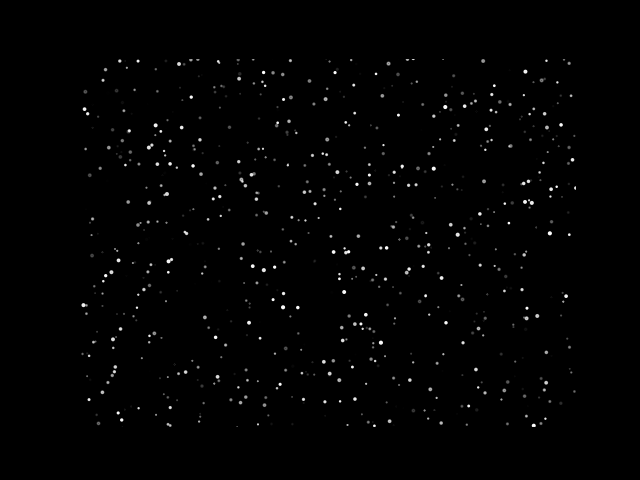

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib widget

np.random.seed(42)

# Star background
N_star = 1000
x_star = np.random.uniform(0, 2 * np.pi, N_star)
y_star = np.random.uniform(-2, 2, N_star)
alpha_star = np.random.uniform(0, 1, N_star)
area = (2 * np.random.rand(N_star))**2

fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.scatter(x_star, y_star, s=area, c='white', alpha=alpha_star)

ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([0, np.pi, 2 * np.pi])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])

# Parameters
N = 50  # tail segments
radius = 1.0
center_x, center_y = np.pi, 0
total_frames = 1000

# Tail segments and heads
tail1 = [ax.plot([], [], color='gold', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 3, N)]
tail2 = [ax.plot([], [], color='deepskyblue', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 3, N)]

head1, = ax.plot([], [], 'o', color='gold', alpha=0)
head2, = ax.plot([], [], 'o', color='deepskyblue', alpha=0)

def animate(i):
    t = i / total_frames * 2 * np.pi  # Full circle
    progress = np.sin(np.pi * (i % total_frames) / total_frames)  # fade in/out

    # Position of each head
    x1 = center_x + radius * np.cos(t)
    y1 = center_y + radius * np.sin(t)

    x2 = center_x + radius * np.cos(t + np.pi)
    y2 = center_y + radius * np.sin(t + np.pi)

    # Tail coordinates
    for j in range(N):
        tail_angle = t - j * 0.05  # time-shifted to trail behind
        x_tail1 = [center_x + radius * np.cos(tail_angle),
                   center_x + radius * np.cos(tail_angle - 0.05)]
        y_tail1 = [center_y + radius * np.sin(tail_angle),
                   center_y + radius * np.sin(tail_angle - 0.05)]

        x_tail2 = [center_x + radius * np.cos(tail_angle + np.pi),
                   center_x + radius * np.cos(tail_angle + np.pi - 0.05)]
        y_tail2 = [center_y + radius * np.sin(tail_angle + np.pi),
                   center_y + radius * np.sin(tail_angle + np.pi - 0.05)]

        alpha = 1 #progress * (j + 1) / N
        tail1[j].set_data(x_tail1, y_tail1)
        tail1[j].set_alpha(alpha)

        tail2[j].set_data(x_tail2, y_tail2)
        tail2[j].set_alpha(alpha)

    head1.set_data([x1], [y1])
    head2.set_data([x2], [y2])
    head1.set_alpha(1)
    head2.set_alpha(1)

    return tail1 + tail2 + [head1, head2]

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=total_frames,
    interval=10,
    blit=True
)

plt.show()


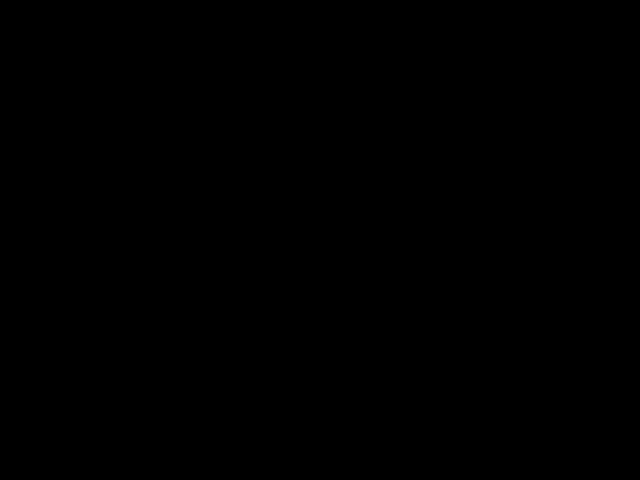

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Stars (in 3D)
# N_star = 1000
# x_star = np.random.uniform(0, 2 * np.pi, N_star)
# y_star = np.random.uniform(-2, 2, N_star)
# z_star = np.random.uniform(-0.5, 0.5, N_star)
# alpha_star = np.random.uniform(0.2, 0.7, N_star)
# ax.scatter(x_star, y_star, z_star, c='white', s=1, alpha=alpha_star)

# Orbit center
center = np.array([np.pi, 0, 0])
radius = 40.0
N = 40  # trail segments
total_frames = 360
# total_frames = 360

# Tails
tail1 = [ax.plot([], [], [], color='gold', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]
tail2 = [ax.plot([], [], [], color='deepskyblue', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]

# Heads
head1, = ax.plot([], [], [], 'o', color='gold', markersize=30, alpha=0)
head2, = ax.plot([], [], [], 'o', color='deepskyblue', markersize=30, alpha=0)

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-10, 10)
# ax.set_xticks([0, np.pi, 2 * np.pi])
# ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_zticks([])

def animate(i):
    theta = 2 * np.pi * i / total_frames
    progress = np.sin(np.pi * i / total_frames)

    # Ball positions
    x1 = center[0] + radius * np.cos(theta)
    y1 = center[1] + radius * np.sin(theta)
    z1 = center[2]

    x2 = center[0] + radius * np.cos(theta + np.pi)
    y2 = center[1] + radius * np.sin(theta + np.pi)
    z2 = center[2]

    for j in range(N):
        angle = theta - j * 0.05

        # Trails
        x_seg1 = [center[0] + radius * np.cos(angle),
                  center[0] + radius * np.cos(angle - 0.05)]
        y_seg1 = [center[1] + radius * np.sin(angle),
                  center[1] + radius * np.sin(angle - 0.05)]
        z_seg1 = [0, 0]

        x_seg2 = [center[0] + radius * np.cos(angle + np.pi),
                  center[0] + radius * np.cos(angle + np.pi - 0.05)]
        y_seg2 = [center[1] + radius * np.sin(angle + np.pi),
                  center[1] + radius * np.sin(angle + np.pi - 0.05)]
        z_seg2 = [0, 0]

        alpha = 1 # progress * (j + 1) / N
        tail1[j].set_data(x_seg1, y_seg1)
        tail1[j].set_3d_properties(z_seg1)
        tail1[j].set_alpha(alpha)

        tail2[j].set_data(x_seg2, y_seg2)
        tail2[j].set_3d_properties(z_seg2)
        tail2[j].set_alpha(alpha)

    head1.set_data([x1], [y1])
    head1.set_3d_properties([z1])
    head1.set_alpha(1)

    head2.set_data([x2], [y2])
    head2.set_3d_properties([z2])
    head2.set_alpha(1)

    # Rotate camera
    # ax.view_init(elev=0, azim=(i % 360))
    ax.view_init(elev=15, azim = 10)

    return tail1 + tail2 + [head1, head2]

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=total_frames,
    interval=30,
    blit=True
)

ax.set_axis_off()
ax.grid(False)

plt.show()


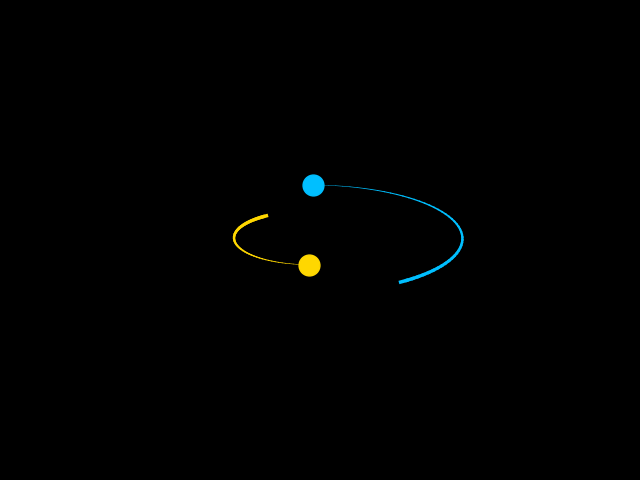

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Binary star parameters
m1 = 10.0  # mass of star 1
m2 = 5.0  # mass of star 2
R = 10.0   # total distance between stars

# Compute radii from center of mass
r1 = m2 / (m1 + m2) * R
r2 = m1 / (m1 + m2) * R

# Center of mass
center = np.array([np.pi, 0, 0])

# Animation settings
N = 50
total_frames = 360

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_axis_off()
ax.grid(False)
ax.view_init(elev=45, azim= 0)

# # Stars
# N_star = 1000
# x_star = np.random.uniform(0, 2 * np.pi, N_star)
# y_star = np.random.uniform(-2, 2, N_star)
# z_star = np.random.uniform(-0.5, 0.5, N_star)
# alpha_star = np.random.uniform(0.2, 1, N_star)
# ax.scatter(x_star, y_star, z_star, c='white', s=1, alpha=alpha_star)

# Tails and heads
tail1 = [ax.plot([], [], [], color='gold', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]
tail2 = [ax.plot([], [], [], color='deepskyblue', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]
head1, = ax.plot([], [], [], 'o', color='gold', markersize=15, alpha=0)
head2, = ax.plot([], [], [], 'o', color='deepskyblue', markersize=15, alpha=0)

ax.set_xlim(center[0] - R, center[0] + R)
ax.set_ylim((center[0] - R) // 2, (center[0] + R) // 2)
ax.set_zlim(-1.5, 1.5)

def animate(i):
    theta = 2 * np.pi * i / total_frames
    progress = np.sin(np.pi * i / total_frames)

    # Star positions
    x1 = center[0] + r1 * np.cos(theta)
    y1 = center[1] + r1 * np.sin(theta)
    x2 = center[0] - r2 * np.cos(theta)
    y2 = center[1] - r2 * np.sin(theta)
    z = center[2]

    for j in range(N):
        angle = theta - j * 0.05

        seg1_x = [center[0] + r1 * np.cos(angle), center[0] + r1 * np.cos(angle - 0.05)]
        seg1_y = [center[1] + r1 * np.sin(angle), center[1] + r1 * np.sin(angle - 0.05)]
        seg2_x = [center[0] - r2 * np.cos(angle), center[0] - r2 * np.cos(angle - 0.05)]
        seg2_y = [center[1] - r2 * np.sin(angle), center[1] - r2 * np.sin(angle - 0.05)]
        seg_z = [z, z]

        alpha = 1 #progress * (j + 1) / N
        tail1[j].set_data(seg1_x, seg1_y)
        tail1[j].set_3d_properties(seg_z)
        tail1[j].set_alpha(alpha)

        tail2[j].set_data(seg2_x, seg2_y)
        tail2[j].set_3d_properties(seg_z)
        tail2[j].set_alpha(alpha)

    head1.set_data([x1], [y1])
    head1.set_3d_properties([z])
    head1.set_alpha(1)

    head2.set_data([x2], [y2])
    head2.set_3d_properties([z])
    head2.set_alpha(1)

    # ax.view_init(elev=35, azim = 10)

    return tail1 + tail2 + [head1, head2]

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=total_frames,
    interval=30,
    blit=True
)
ani.save('binary1.gif', writer='pillow', fps=30)
plt.show()


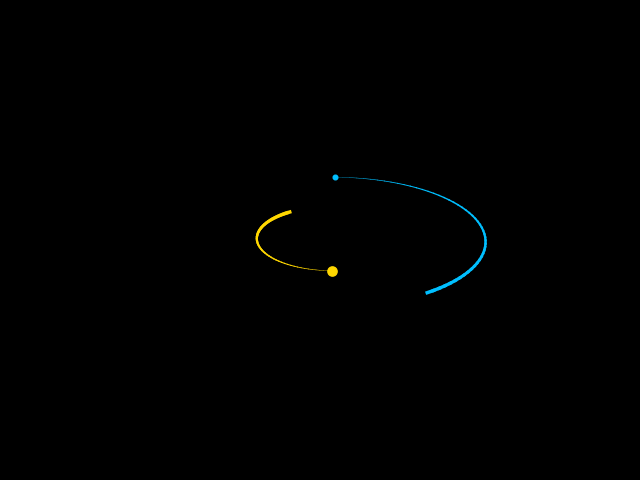

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Physics constants (normalized units)
G = 1.0            # Gravitational constant
m1 = 2.0           # Mass of star 1
m2 = 1.0           # Mass of star 2
R = 1.0            # Total separation between stars

# Center of mass and orbital radii
r1 = m2 / (m1 + m2) * R
r2 = m1 / (m1 + m2) * R
center = np.array([np.pi, 0, 0])

# Orbital period from Kepler's 3rd law
a = R
T = 2 * np.pi * np.sqrt(a**3 / (G * (m1 + m2)))

# Time and animation setup
N = 50
total_frames = 360
dt = T / total_frames

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_axis_off()
ax.grid(False)
ax.view_init(elev=25, azim= 0)


# Tail lines and head markers
tail1 = [ax.plot([], [], [], color='gold', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]
tail2 = [ax.plot([], [], [], color='deepskyblue', lw=lw, alpha=0)[0]
         for lw in np.linspace(0.2, 2.5, N)]

base_size = 10
size1 = base_size * m1 / (m1 + m2)
size2 = base_size * m2 / (m1 + m2)

head1, = ax.plot([], [], [], 'o', color='gold', markersize=size1, alpha=0)
head2, = ax.plot([], [], [], 'o', color='deepskyblue', markersize=size2, alpha=0)

zoom = 0.5  # smaller = tighter zoom
ax.set_xlim(center[0] - zoom, center[0] + zoom)
ax.set_ylim(-zoom, zoom)
ax.set_zlim(-zoom, zoom)


def animate(i):
    t = i * dt
    theta = 2 * np.pi * t / T
    # progress = np.sin(np.pi * i / total_frames)

    # Orbital positions
    x1 = center[0] + r1 * np.cos(theta)
    y1 = center[1] + r1 * np.sin(theta)
    x2 = center[0] - r2 * np.cos(theta)
    y2 = center[1] - r2 * np.sin(theta)
    z = center[2]

    for j in range(N):
        angle = theta - j * 0.05
        seg1_x = [center[0] + r1 * np.cos(angle), center[0] + r1 * np.cos(angle - 0.05)]
        seg1_y = [center[1] + r1 * np.sin(angle), center[1] + r1 * np.sin(angle - 0.05)]
        seg2_x = [center[0] - r2 * np.cos(angle), center[0] - r2 * np.cos(angle - 0.05)]
        seg2_y = [center[1] - r2 * np.sin(angle), center[1] - r2 * np.sin(angle - 0.05)]
        seg_z = [z, z]
        alpha = 1 #progress * (j + 1) / N

        tail1[j].set_data(seg1_x, seg1_y)
        tail1[j].set_3d_properties(seg_z)
        tail1[j].set_alpha(alpha)

        tail2[j].set_data(seg2_x, seg2_y)
        tail2[j].set_3d_properties(seg_z)
        tail2[j].set_alpha(alpha)

    head1.set_data([x1], [y1])
    head1.set_3d_properties([z])
    head1.set_alpha(1)

    head2.set_data([x2], [y2])
    head2.set_3d_properties([z])
    head2.set_alpha(1)

    return tail1 + tail2 + [head1, head2]

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=total_frames,
    interval=30,
    blit=True
)

ani.save('binary2.gif', writer='pillow', fps=30)

plt.show()
